In [1]:
import numpy as np
import statistics as st
import scipy.stats as sts
import matplotlib.pyplot as plt
import locale

In [2]:
# load as string
sample = np.loadtxt('data.txt', dtype='str')

In [3]:
sample[:5]

array(['0,144', '0,937', '1,787', '-1,052', '-0,192'], dtype='<U6')

In [4]:
# dataset has floats with european decimal comma separator
# reset locale, convert to float
locale.setlocale(locale.LC_ALL, 'de_DE')
sample = np.array(list(map(locale.atof, sample)))

In [5]:
sample[:5]

array([ 0.144,  0.937,  1.787, -1.052, -0.192])

In [6]:
x = np.sort(sample)
print(x)

[-1.052 -0.816 -0.805 -0.773 -0.541 -0.491 -0.489 -0.454 -0.437 -0.421
 -0.378 -0.356 -0.312 -0.299 -0.255 -0.192 -0.183 -0.134 -0.11  -0.094
 -0.051 -0.045 -0.026  0.02   0.129  0.143  0.144  0.169  0.176  0.228
  0.261  0.363  0.364  0.398  0.402  0.416  0.417  0.423  0.467  0.502
  0.56   0.605  0.644  0.717  0.724  0.735  0.811  0.837  0.877  0.898
  0.937  0.947  0.975  1.047  1.087  1.091  1.092  1.109  1.124  1.131
  1.162  1.229  1.294  1.341  1.355  1.36   1.363  1.365  1.379  1.399
  1.418  1.503  1.554  1.57   1.621  1.661  1.705  1.752  1.759  1.787
  1.858  1.978  2.018  2.121  2.135  2.286  2.32   2.344  2.382  2.434
  2.453  2.468  2.537  2.559  2.587  2.623  2.95   3.194  3.285  3.329]


In [7]:
# descriptive statistics
print('mean =', st.mean(x))
print('median =', st.median(x))
print('median_low =', st.median_low(x))
print('median_high =', st.median_high(x))
print('mode =', st.mode(x))
print('pst_dev =', st.pstdev(x))
print('st_dev =', st.stdev(x))
print('pvariance =', st.pvariance(x))
print('variance =', st.variance(x))
print('range =', np.ptp(x))
print('max =', np.amax(x))
print('min =', np.amin(x))

mean = 0.93694
median = 0.9175
median_low = 0.898
median_high = 0.937
mode = -1.052
pst_dev = 1.038439770232246
st_dev = 1.0436712379524948
pvariance = 1.0783571564
variance = 1.089249652929293
range = 4.381
max = 3.329
min = -1.052


In [8]:
# cumulative sum
print(np.cumsum(x))

[-1.052 -1.868 -2.673 -3.446 -3.987 -4.478 -4.967 -5.421 -5.858 -6.279
 -6.657 -7.013 -7.325 -7.624 -7.879 -8.071 -8.254 -8.388 -8.498 -8.592
 -8.643 -8.688 -8.714 -8.694 -8.565 -8.422 -8.278 -8.109 -7.933 -7.705
 -7.444 -7.081 -6.717 -6.319 -5.917 -5.501 -5.084 -4.661 -4.194 -3.692
 -3.132 -2.527 -1.883 -1.166 -0.442  0.293  1.104  1.941  2.818  3.716
  4.653  5.6    6.575  7.622  8.709  9.8   10.892 12.001 13.125 14.256
 15.418 16.647 17.941 19.282 20.637 21.997 23.36  24.725 26.104 27.503
 28.921 30.424 31.978 33.548 35.169 36.83  38.535 40.287 42.046 43.833
 45.691 47.669 49.687 51.808 53.943 56.229 58.549 60.893 63.275 65.709
 68.162 70.63  73.167 75.726 78.313 80.936 83.886 87.08  90.365 93.694]


In [9]:
# normal distribution with sample mean and variance
mean,var = st.mean(x),st.pvariance(x)
norm_rv = sts.norm(mean, var)
cdf = norm_rv.cdf(x)
pdf = norm_rv.pdf(x)

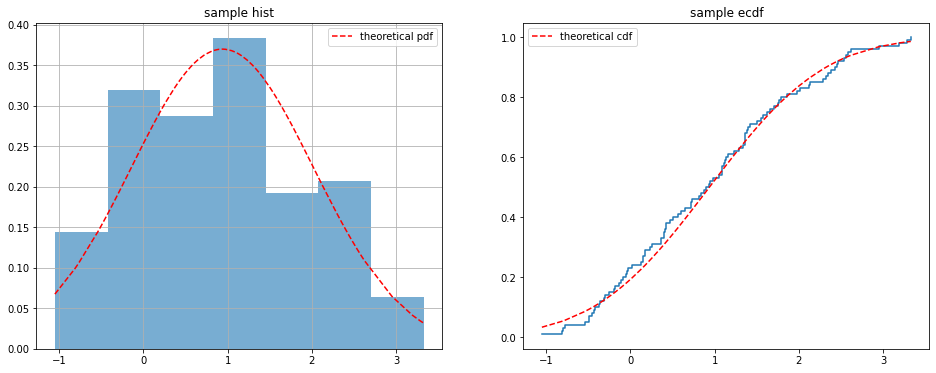

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# plot histogramm
ax1.hist(x, bins='fd', density=True, alpha=0.6)
ax1.plot(x, pdf, 'r--', label='theoretical pdf')
ax1.set_title('sample hist')
ax1.legend()
ax1.grid()

# plot empirical cdf
# y = np.arange(1, len(x)+1) / float(len(x)) # simple, non-canonical
y = np.array([len(x[x <= i]) for i in x]) / len(x)
ax2.plot(x, y, drawstyle='steps-post')
ax2.plot(x, cdf, 'r--', label='theoretical cdf')
ax2.set_title('sample ecdf')
ax2.legend()

plt.show()